# Import Statements, Settings, and Initializing DF

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.options.display.max_rows = 50
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

In [2]:
file = 'student_data.csv'
# Replace Na values with NULL object
df = pd.read_csv(file, na_values = ['NULL'])

# Data Cleaning

In [3]:
# Replace NULL values with values from previously 
# seen values in that specific column 'forward fill method'
df = df.fillna(method='ffill')

C:\Users\Precision5570\AppData\Local\Temp\ipykernel_13992\2330808437.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [4]:
# Count number of any missing values seen
num_missing = df.isnull().any().sum()
num_missing

0

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
# According to what we have observed and what is required for our analysis, no further cleaning is required such as removing duplicates or managing outliers.

# Understanding the Data

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
df.size

13035

In [9]:
# Shape X=Rows, Y=Columns
df.shape

(395, 33)

In [10]:
# Showcase the different data types for each column
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


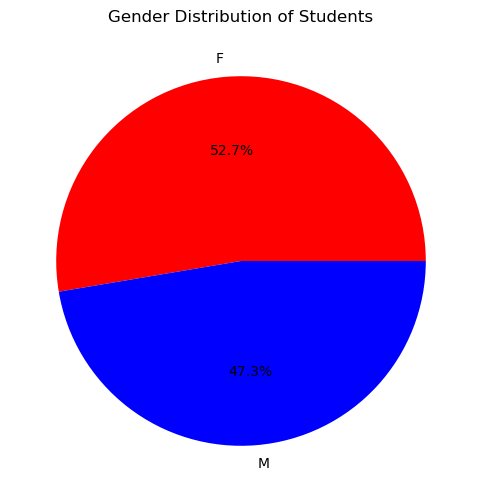

In [11]:
# Gender disctribution in our dataset, females are lightblue, males are light red.
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['red','blue'])
plt.title('Gender Distribution of Students')
plt.show()

Text(0.5, 1.0, 'Address Distribution R=Rural, U=Urban')

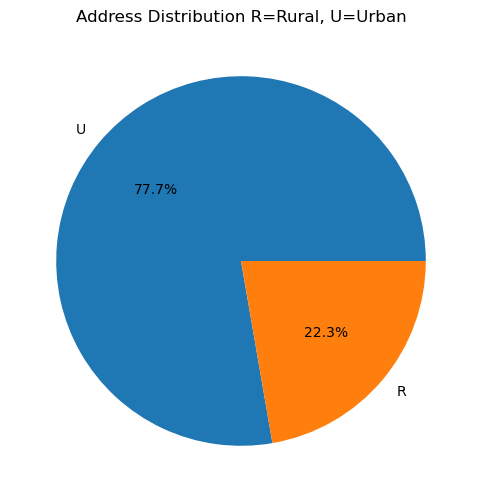

In [12]:
address = df['address'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(address, labels = address.index, autopct='%1.1f%%')
plt.title('Address Distribution R=Rural, U=Urban')

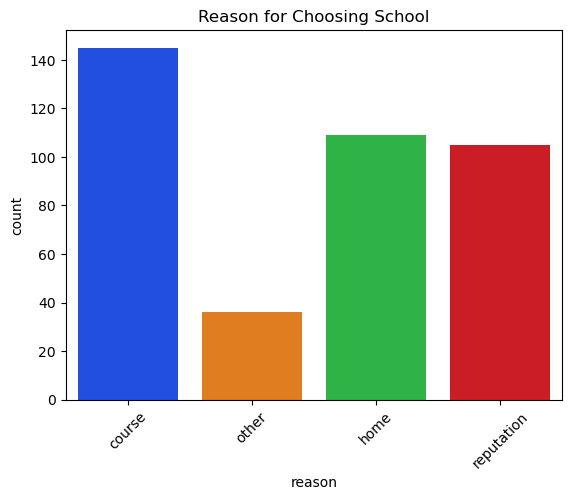

In [13]:
# Reason that a student has been chosen for a specific school
sns.countplot(x='reason', data=df, palette='bright')
plt.title('Reason for Choosing School')
plt.xticks(rotation=45)
plt.show()

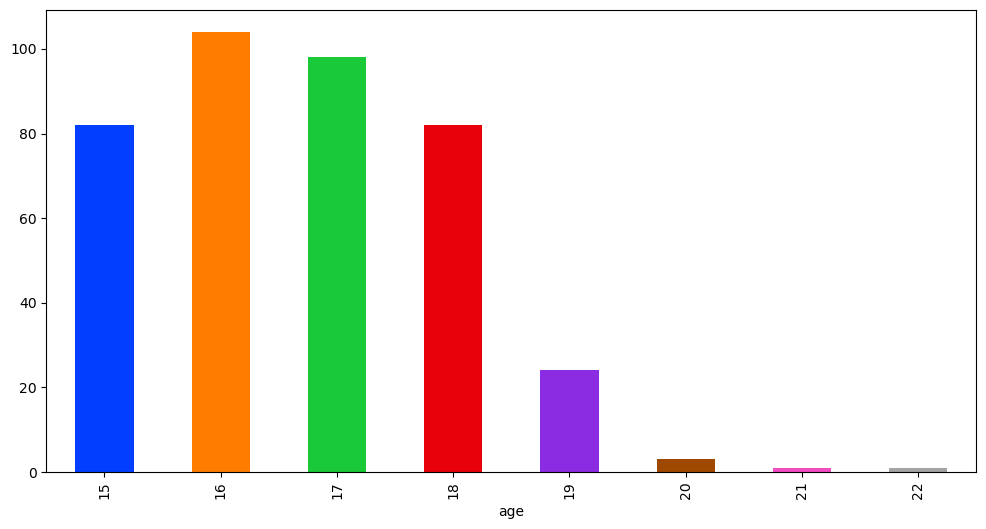

In [14]:
# Age distribution
plt.figure(figsize=(12, 6))
age_counts = df['age'].value_counts().sort_index()
df['age'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette('bright', len(age_counts)))
plt.show()

C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution')

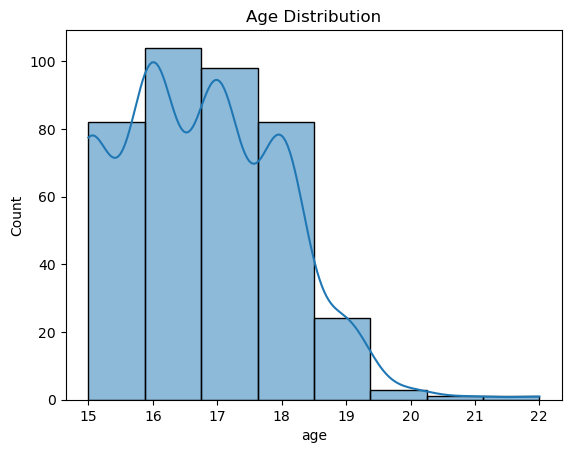

In [15]:
# Another visualization for the age distribution
sns.histplot(df['age'], bins=len(df['age'].unique()), kde=True, label='Age Distribution')
plt.title('Age Distribution')

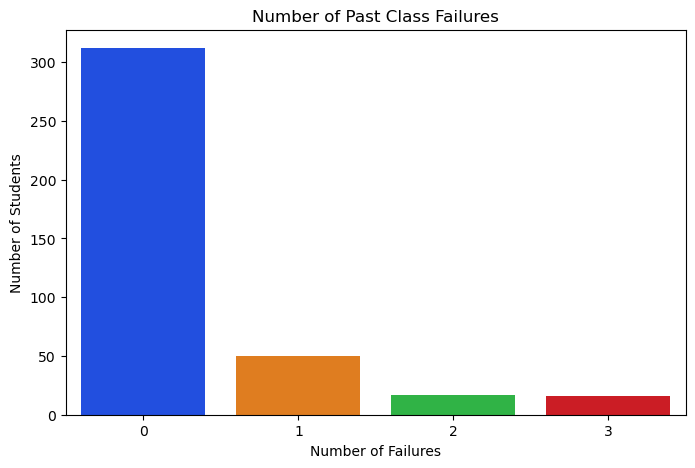

In [16]:
# Distribution of number of failures across all students in the dataset
plt.figure(figsize=(8, 5))
sns.countplot(x='failures', data=df, palette='bright')
plt.title('Number of Past Class Failures')
plt.xlabel('Number of Failures')
plt.ylabel('Number of Students')
plt.show()

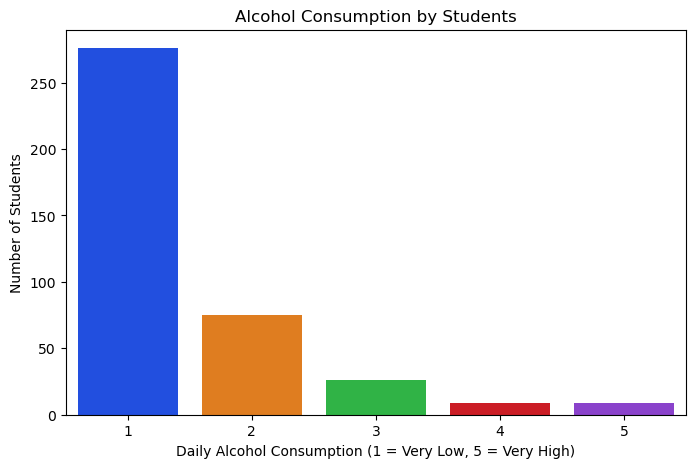

In [17]:
# Alcohol consumption of students distribution
alcohol_counts = df['Dalc'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=alcohol_counts.index, y=alcohol_counts.values, palette='bright')
plt.title('Alcohol Consumption by Students')
plt.xlabel('Daily Alcohol Consumption (1 = Very Low, 5 = Very High)')
plt.ylabel('Number of Students')
plt.show()

C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1600x400 with 0 Axes>

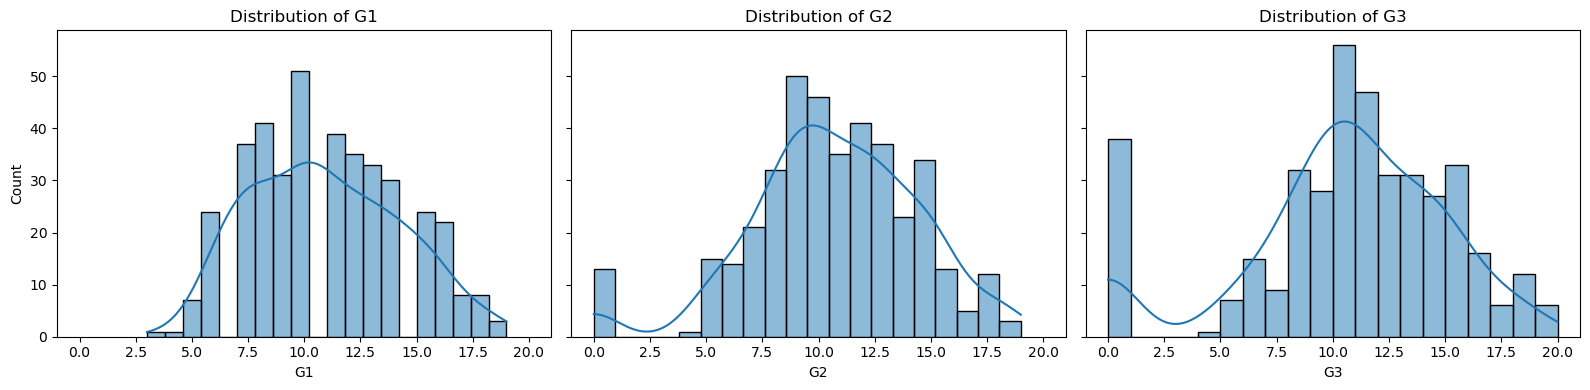

In [18]:
# Grade Distribition for each semester
plt.figure(figsize=(16, 4))
fig, axs = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)

for i, grade in enumerate(['G1', 'G2', 'G3']):
    sns.histplot(df[grade], bins=20, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {grade}')

plt.tight_layout()
plt.show()

In [19]:
# Before continuing, we need a simple way to track the grades of each student, but without accessing multiple
# variables at a time (G1,G2,G3), therefore we take the mean of all the semester grades (G1,G2,G3) and assign
# them to a new variable/columns 'average_G':
df['average_G'] = df[['G1', 'G2', 'G3']].mean(axis=1)

C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average Grade Distribution')

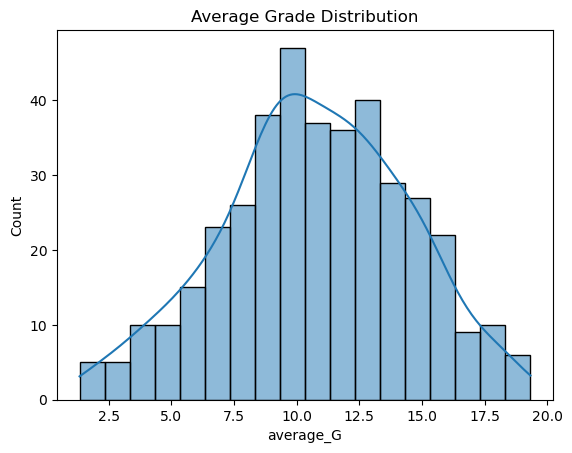

In [20]:
sns.histplot(df['average_G'], kde=True, bins=18)
plt.title("Average Grade Distribution")

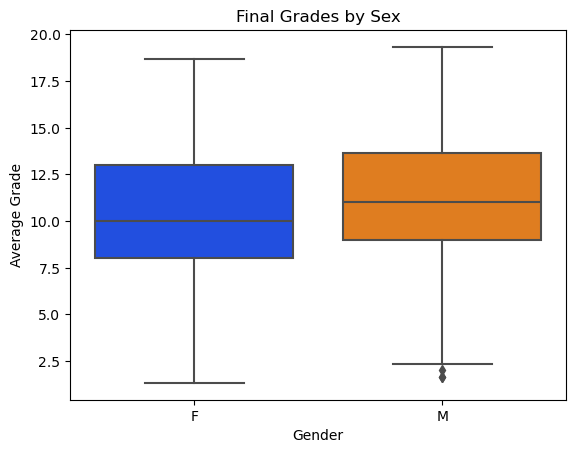

In [21]:
sns.boxplot(x='sex', y='average_G', palette='bright', data=df)
plt.title('Final Grades by Sex')
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.show()

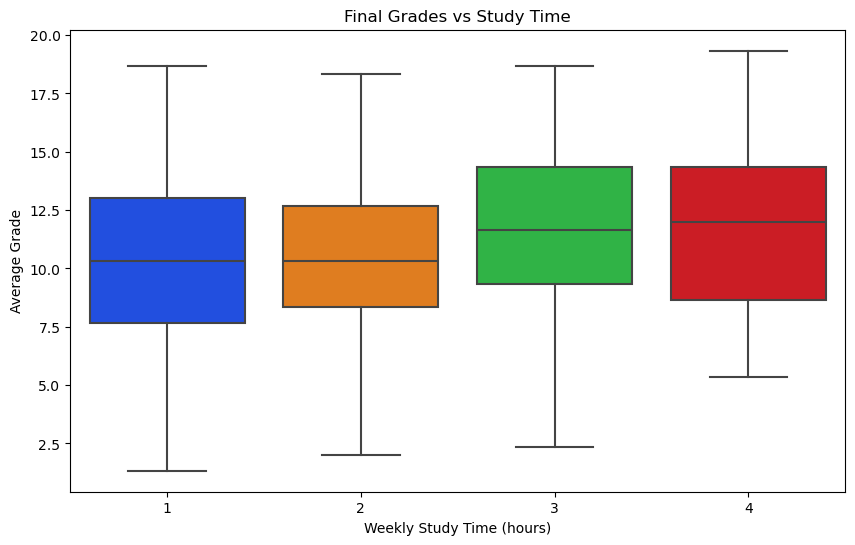

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='average_G', data=df, palette='bright')
plt.title('Final Grades vs Study Time')
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('Average Grade')
plt.show()

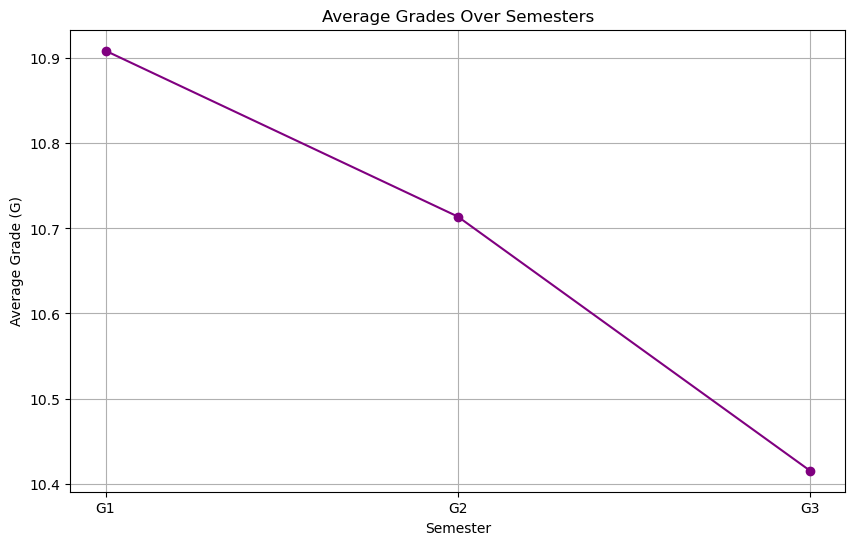

In [23]:
average_grades = df[['G1', 'G2', 'G3']].mean()
semesters = ['G1', 'G2', 'G3']

plt.figure(figsize=(10, 6))
plt.plot(semesters, average_grades, marker='o', linestyle='-', color='purple')
plt.title('Average Grades Over Semesters')
plt.xlabel('Semester')
plt.ylabel('Average Grade (G)')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Box Plots of Average Grade Accross Ages and Sex')

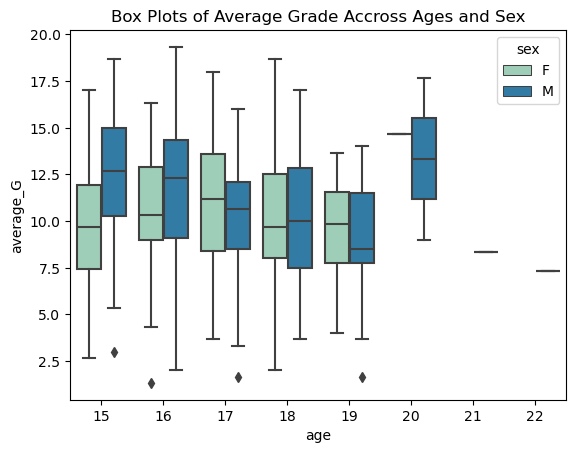

In [24]:
sns.boxplot(x='age', y='average_G', data=df, hue='sex', palette='YlGnBu')
plt.title("Box Plots of Average Grade Accross Ages and Sex")

<Axes: xlabel='reason', ylabel='average_G'>

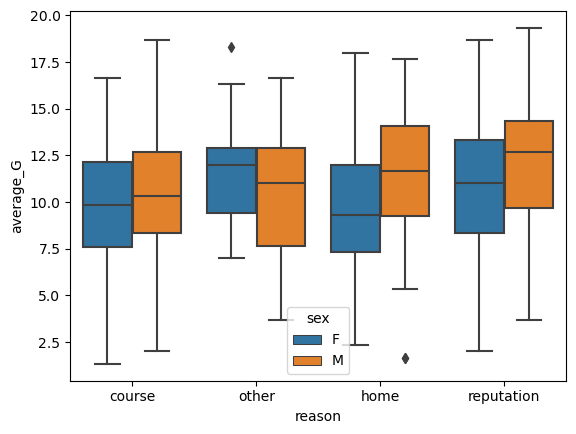

In [25]:
sns.boxplot(x='reason',y='average_G', hue='sex', data=df)

Text(0.5, 1.0, 'Father n Mother Education compared to students Average G')

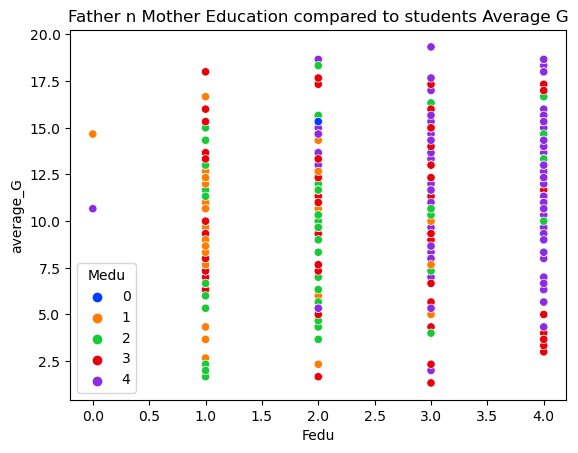

In [26]:
# UNEXPECTED OUTCOME/CONCLUSION, couples tend to be married to the same level of education
# Completely unrelated, but a powerful statement showcasing what unexpected outcomes
# and understanding we can derive from completely unrelated dataset purposes.
df['average_G'] = df[['G1', 'G2', 'G3']].mean(axis=1)
sns.scatterplot(x='Fedu', y='average_G', hue='Medu', data=df, palette="bright")
#sns.stripplot(x='Fedu',y='average_G', hue='sex', size='Medu', data=df)
plt.title('Father n Mother Education compared to students Average G')

C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Precision5570\AppData\Local\Temp\ipykernel_13992\2119479302.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Medu', y='average_G', data=df, hue='higher', dodge=True, palette={'darkblue', 'darkred'}, linestyles='-', errwidth=1, capsize=0.1, ci='sd')


Text(0.5, 1.0, 'Student Performance against Mother Education and Higher Education')

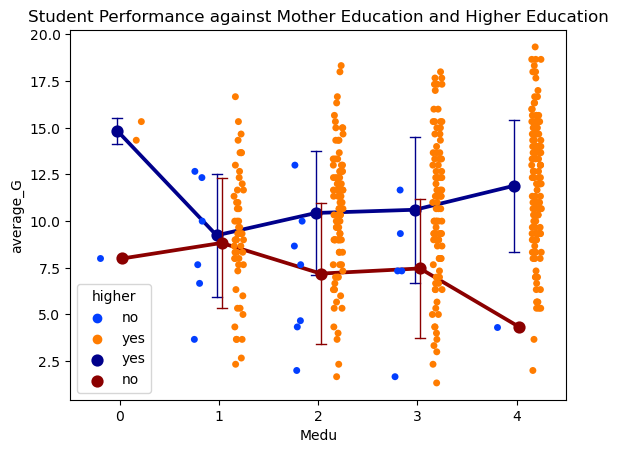

In [27]:
# Higher here means whether the student would like to pursue a higher level of education aka university.
# 1=True, 0=False
sns.stripplot(x='Medu', y='average_G', data=df, hue='higher', dodge=True, palette='bright')
sns.pointplot(x='Medu', y='average_G', data=df, hue='higher', dodge=True, palette={'darkblue', 'darkred'}, linestyles='-', errwidth=1, capsize=0.1, ci='sd')
plt.title('Student Performance against Mother Education and Higher Education')

C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Precision5570\AppData\Local\Temp\ipykernel_13992\762716010.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Fedu', y='average_G', data=df, hue='higher', dodge=True, palette={'darkblue', 'darkred'}, linestyles='-', errwidth=1, capsize=0.1, ci='sd')


Text(0.5, 1.0, 'Student Performance against Father Education and Higher Education')

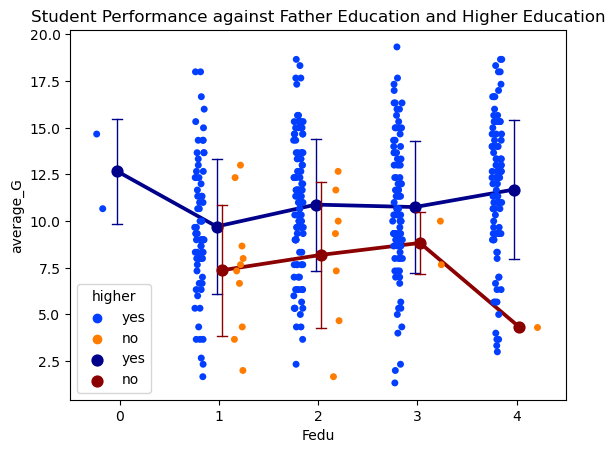

In [28]:
# We do the same for Fedu and higher:
sns.stripplot(x='Fedu', y='average_G', data=df, hue='higher', dodge=True, palette='bright')
sns.pointplot(x='Fedu', y='average_G', data=df, hue='higher', dodge=True, palette={'darkblue', 'darkred'}, linestyles='-', errwidth=1, capsize=0.1, ci='sd')
plt.title('Student Performance against Father Education and Higher Education')

Text(0, 0.5, 'Average Grade')

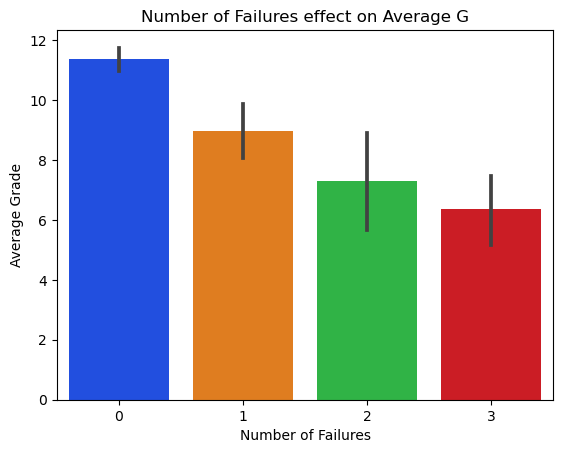

In [29]:
sns.barplot(x='failures', y='average_G', data=df, palette='bright')
plt.title('Number of Failures effect on Average G')
plt.xlabel('Number of Failures')
plt.ylabel('Average Grade')

A very powerful statement can be dervied from this plot, the number of failures a student has experienced can have a profound negative impact on there performance in future endeavours.

Text(0, 0.5, 'Average Grade')

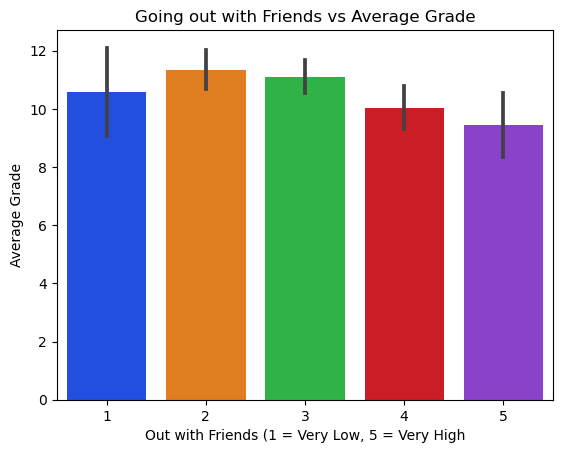

In [30]:
sns.barplot(x='goout', y='average_G', data=df, palette='bright')
plt.title('Going out with Friends vs Average Grade')
plt.xlabel('Out with Friends (1 = Very Low, 5 = Very High')
plt.ylabel('Average Grade')

Going out with friends is a double-edged sword, going out a fair bit of number of times is actually beneficial, but too much will have negative consequences on their grade.

C:\Users\Precision5570\AppData\Local\Temp\ipykernel_13992\4238545085.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age', y='average_G', data=df, ci=None)
C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age vs Grade Performance')

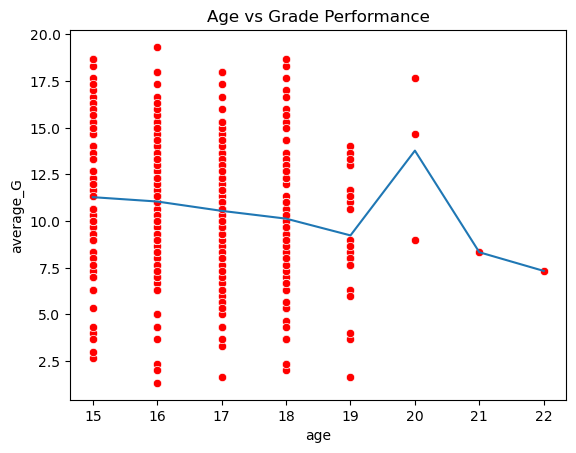

In [31]:
sns.lineplot(x='age', y='average_G', data=df, ci=None)
sns.scatterplot(x='age', y='average_G', data=df, color='red', marker='o')
plt.title('Age vs Grade Performance')

C:\Users\Precision5570\AppData\Local\Temp\ipykernel_13992\48731928.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='traveltime', y='average_G', data=df, ci=None)
C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Travel Time vs Grade Performance')

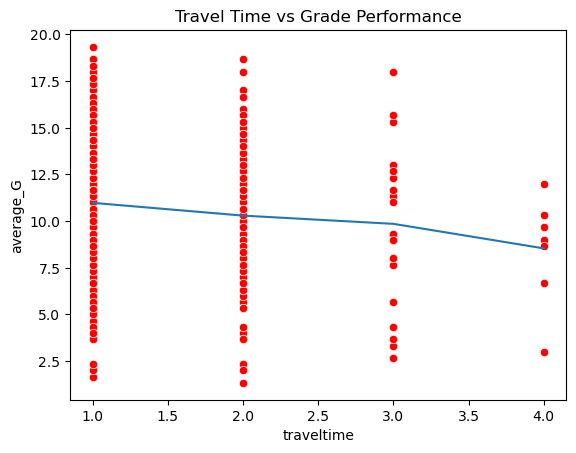

In [32]:
sns.lineplot(x='traveltime', y='average_G', data=df, ci=None)
sns.scatterplot(x='traveltime', y='average_G', data=df, color='red', marker='o')
plt.title('Travel Time vs Grade Performance')

# Machine Learning

In [33]:
# Convert string columns to integers using LabelEncoder
label_encoder = LabelEncoder()
columns_to_convert = ['school', 'sex', 'address', 'famsize', 
                      'Pstatus', 'Mjob', 'Fjob', 'reason', 
                      'guardian', 'schoolsup', 'famsup', 
                      'paid', 'activities', 'nursery', 
                      'higher', 'internet', 'romantic']

for col in columns_to_convert:
    df[col] = label_encoder.fit_transform(df[col])

In [40]:
X = df.drop(['G1', 'G2', 'G3','average_G'], axis=1)
y = df['average_G']

def mse_mean_100_tests(model):
    mse = 0
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        mse += mean_squared_error(y_test, prediction)
    return mse/100

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mse_mean = mse_mean_100_tests(lr_model)
print("Linear Regression MSE over 100 tests: ", lr_mse_mean)

Linear Regression MSE over 100 tests:  12.289290083285241


In [46]:
# Decision Tree
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
dt_model = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

dt_predictions = best_dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mse_mean = mse_mean_100_tests(best_dt_model)
print("Decision Tree MSE over 100 tests:", dt_mse_mean)


Best Parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree MSE over 100 tests: 14.110978936138658


In [47]:
# K-Nearest Neighbors
param_grid = {
    'n_neighbors': range(1, 21),  # Tune the number of neighbors from 1 to 20
    'weights': ['uniform', 'distance'],  # Different weight functions
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Different algorithms
    'p': [1, 2]  # Power parameter for the Minkowski metric (1: Manhattan distance, 2: Euclidean distance)
}

knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

knn_model = grid_search.best_estimator_

knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
print("Best KNN Model Parameters:", knn_model.get_params())
knn_mse_mean = mse_mean_100_tests(knn_model)
print("KNN MSE over 100 tests:", knn_mse_mean)

Best KNN Model Parameters: {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
KNN MSE over 100 tests: 12.065874015471168


In [48]:
# Polynomial Regression
for i in range(6):

    degree = i 
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    
    # If you still want to visualize, you can select one feature to plot along with the regression line.
    # For simplicity, I'll skip plotting in this example.
    
    y_pred_train = poly_reg.predict(X_train_poly)
    mse_train = mean_squared_error(y_train, y_pred_train)
    print('Mean Squared Error (Train): %f | Degree: %d' % (mse_train,i))
    
    y_pred_test = poly_reg.predict(X_test_poly)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print('Mean Squared Error (Test):%f | Degree: %d' % (mse_test,i))
    print('------------------------------------------------------------------\n')

Mean Squared Error (Train): 13.763111 | Degree: 0
Mean Squared Error (Test):13.105736 | Degree: 0
------------------------------------------------------------------

Mean Squared Error (Train): 10.003687 | Degree: 1
Mean Squared Error (Test):10.611209 | Degree: 1
------------------------------------------------------------------

Mean Squared Error (Train): 0.000000 | Degree: 2
Mean Squared Error (Test):83.561435 | Degree: 2
------------------------------------------------------------------

Mean Squared Error (Train): 0.000000 | Degree: 3
Mean Squared Error (Test):367.392327 | Degree: 3
------------------------------------------------------------------

Mean Squared Error (Train): 0.000000 | Degree: 4
Mean Squared Error (Test):1280.494220 | Degree: 4
------------------------------------------------------------------

Mean Squared Error (Train): 0.000000 | Degree: 5
Mean Squared Error (Test):31190.533302 | Degree: 5
------------------------------------------------------------------



In [49]:
# Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
poly_model.fit(X_train, y_train)
poly_predictions = poly_model.predict(X_test)
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_mse_mean = mse_mean_100_tests(poly_model)
print("Polynomial Regression (Degree 1) MSE over 100 tests:", poly_mse_mean)

Polynomial Regression (Degree 1) MSE over 100 tests: 11.754622264789727


C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


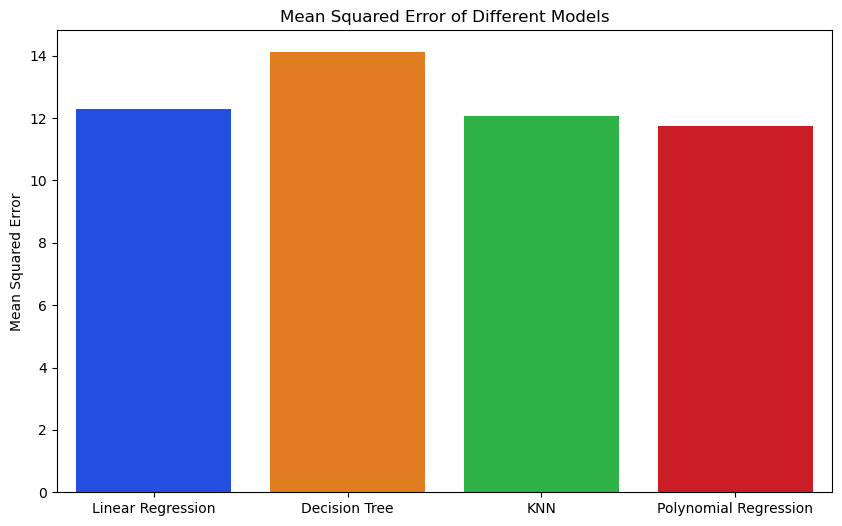

In [51]:
models = ['Linear Regression', 'Decision Tree', 'KNN', 'Polynomial Regression']
mse_values = [lr_mse_mean, dt_mse_mean, knn_mse_mean, poly_mse_mean]

plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Decision Tree', 'KNN', 'Polynomial Regression']
mse_values = [lr_mse_mean, dt_mse_mean, knn_mse_mean, poly_mse_mean]
sns.barplot(x=models, y=mse_values, palette='bright')
plt.title('Mean Squared Error of Different Models')
plt.ylabel('Mean Squared Error')
plt.show()


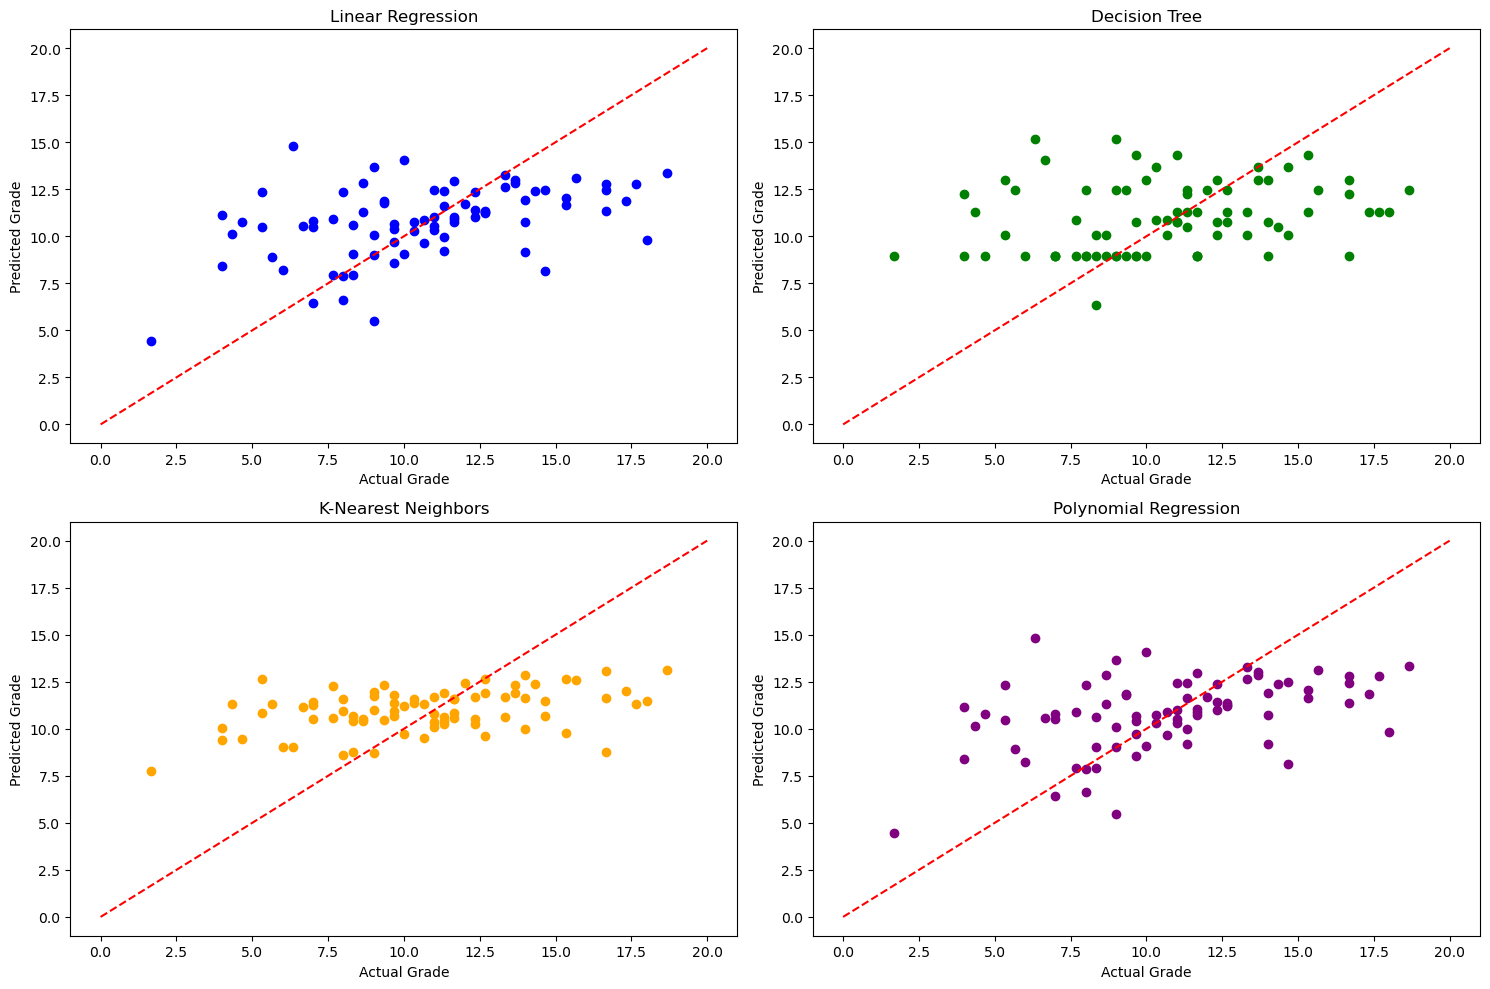

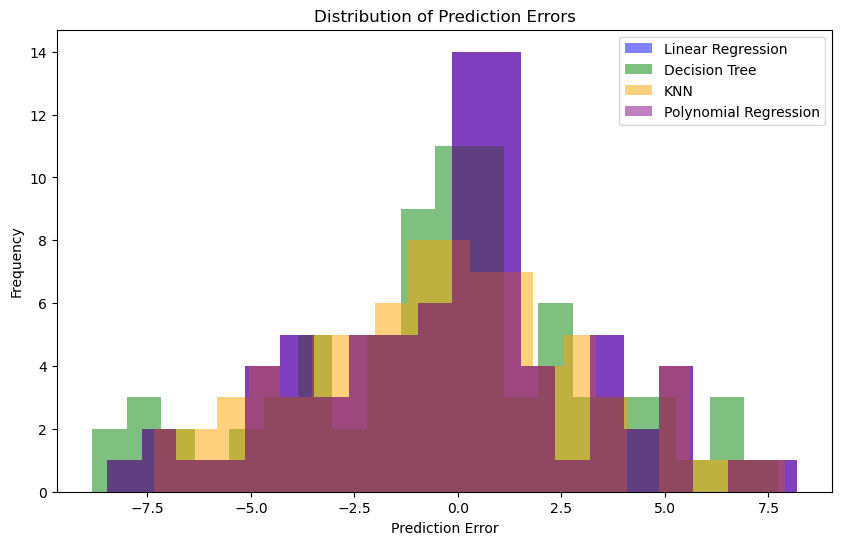

In [52]:
plt.figure(figsize=(15, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, lr_predictions, color='blue')
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.title('Linear Regression')
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')

# Decision Tree
plt.subplot(2, 2, 2)
plt.scatter(y_test, dt_predictions, color='green')
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.title('Decision Tree')
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')

# K-Nearest Neighbors
plt.subplot(2, 2, 3)
plt.scatter(y_test, knn_predictions, color='orange')
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.title('K-Nearest Neighbors')
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')

# Polynomial Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, poly_predictions, color='purple')
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.title('Polynomial Regression')
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')

plt.tight_layout()
plt.show()

# Distribution of prediction errors
plt.figure(figsize=(10, 6))

# Linear Regression
plt.hist(y_test - lr_predictions, bins=20, color='blue', alpha=0.5, label='Linear Regression')

# Decision Tree
plt.hist(y_test - dt_predictions, bins=20, color='green', alpha=0.5, label='Decision Tree')

# K-Nearest Neighbors
plt.hist(y_test - knn_predictions, bins=20, color='orange', alpha=0.5, label='KNN')

# Polynomial Regression
plt.hist(y_test - poly_predictions, bins=20, color='purple', alpha=0.5, label='Polynomial Regression')

plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()
